1. simulate a linearly separable data set with outliers
2. Fit unrehular model and plot learned boundary
3. Apply L2 model and plot

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
def sigmoid(h):
    return 1 / (1 + np.exp(-h))

def cross_entropy(y,p):
    return -np.sum(y*np.log(p) + (1 - y)*np.log(1 - p))

def accuracy(y,p):
    return np.mean(y == np.round(p))

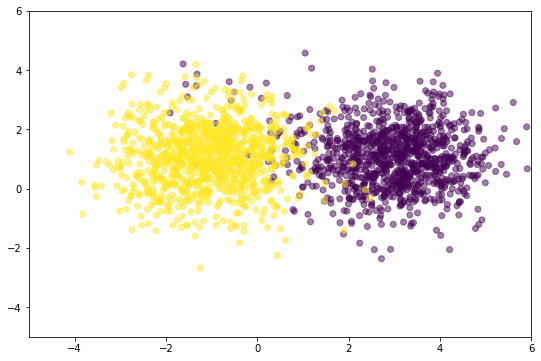

In [71]:
D = 2
K = 2
N = K*1000

X0 = np.random.randn((N//K),D) + np.array([3,1])
X1 = np.random.randn((N//K),D) + np.array([-1,1])

n_out =  20
X0[:n_out,] -= [3,-2]

X = np.vstack((X0,X1))
y = np.array([0]*(N//K)+[1]*(N//K))

n_out =  20


plt.figure(figsize=(9,6))
plt.axis([-5.0, 6.0, -5.0, 6.0])
plt.scatter(X[:,0],X[:,1],c = y,alpha=0.5)

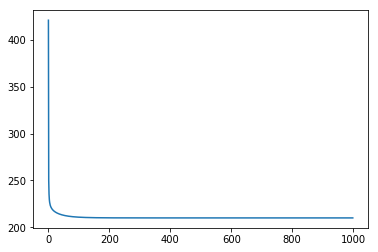

In [72]:
X = np.hstack((np.ones((N,1)),X))
w = np.random.randn(D+1)

J=[]

eta = 1e-3

epochs = 1000

for i in range ( epochs):

    PHI = sigmoid(X.dot(w))
    J.append(cross_entropy(y,PHI))
    w -= eta*X.T.dot(PHI - y)


plt.plot(J)

In [73]:
print ("Accuracy: {}".format(accuracy(y,PHI)))

Accuracy: 0.964


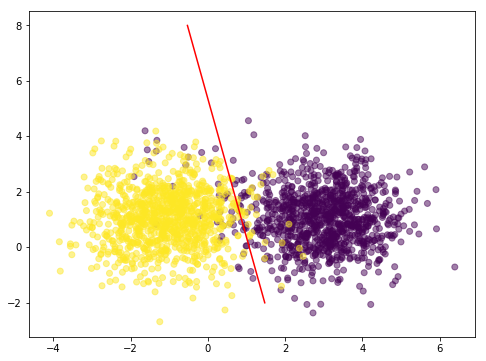

In [74]:
y_values = np.arange(-2,9)
x_values = -(w[0] + np.dot(w[2], y_values)) / w[1]

plt.figure(figsize=(8,6))
plt.scatter(X[:,1],X[:,2],c = y,alpha=0.5)
plt.plot(x_values,y_values,color = "red")

In [77]:
w3 = np.random.randn(D+1)

J3=[]

eta = 1e-4

epochs = 1000

for l2 in range (100):
    
    for i in range ( epochs):

        PHI3 = sigmoid(X.dot(w3))
        J3.append((cross_entropy(y,PHI3) + l2*w3.dot(w3),l2))
        w3 -= eta*(X.T.dot(PHI3 - y) + l2*w3)

#plt.plot(J3)

In [78]:
print ("Accuracy: {}".format(accuracy(y,PHI3)))

Accuracy: 0.9605


In [79]:
l2 = min(J3)[1]
l2

0

In [ ]:
w2 = np.random.randn(D+1)

#J3=[]

eta = 1e-3

epochs = 1000


for i in range ( epochs):

    PHI2 = sigmoid(X.dot(w2))
        #J3.append((cross_entropy(y,PHI3), l2))
    w2 -= eta*(X.T.dot(PHI2 - y) + l2*w2)

print ("Accuracy: {}".format(accuracy(y,PHI2)))

In [ ]:
y_values3 = np.arange(-2,5)
x_values3 = -(w2[0] + np.dot(w2[2], y_values3)) / w2[1]

plt.figure(figsize=(8,6))
plt.scatter(X[:,1],X[:,2],c = y,alpha=0.5)
plt.plot(x_values,y_values,color = "red")
plt.plot(x_values3,y_values3)